In [17]:
import tensorflow.keras as tk
import random
import collections
import numpy as np
import matplotlib.pyplot as plt

In [5]:
dataset = tk.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [10]:
print("There are",len(dataset[0][0]),"images in training dataset")

There are 60000 images in training dataset


In [11]:
print("There are",len(dataset[1][0]),"images in training dataset")

There are 10000 images in training dataset


In [12]:
print(dataset[0][0][0].shape)

(28, 28)


In [15]:
print("Randomly printing 10 images with labels from training dataset")


Randomly printing 10 images with labels from training dataset


In [20]:
import keras
import random
import collections
import numpy as np
import matplotlib.pyplot as plt




def display_random_images_with_labels(d, n=10):
    """
        accept dataset in tuple form, first index
        is np arrays (images) and second is labels
        and display n random images with labels
        from it
        Inputs:
            d (tuple): dataset images, dataset labels on same indexs
            n (int): number of samples to display (default: 10)
        Output:
            None
    """
    choices = list(range(len(d[0])))
    for i in range(n):
        index = random.choice(choices)
        choices.remove(index)
        print("index:",index)
        print("Lable:",d[1][index])
        plt.imshow(d[0][index], cmap='gray')
        plt.show()

Randomly printing 10 images with labels from training dataset
index: 18717
Lable: 4


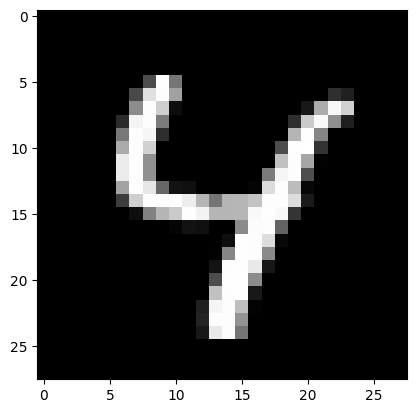

index: 22483
Lable: 8


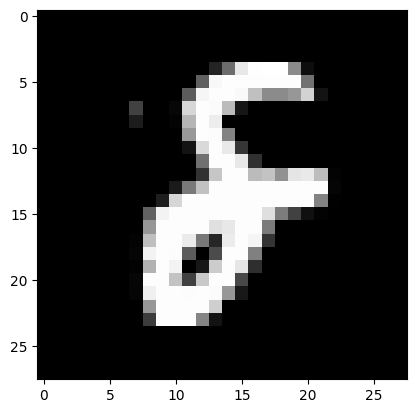

index: 40497
Lable: 2


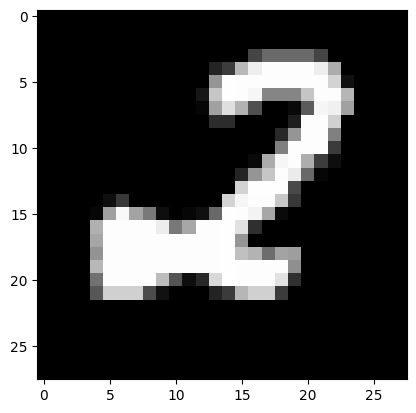

index: 21162
Lable: 9


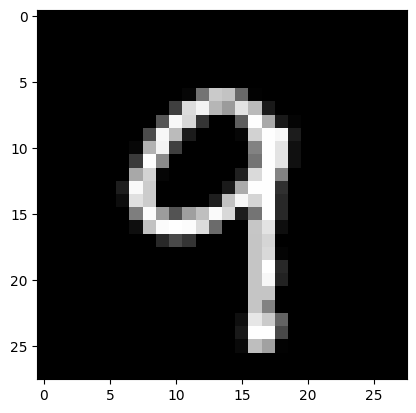

index: 17127
Lable: 3


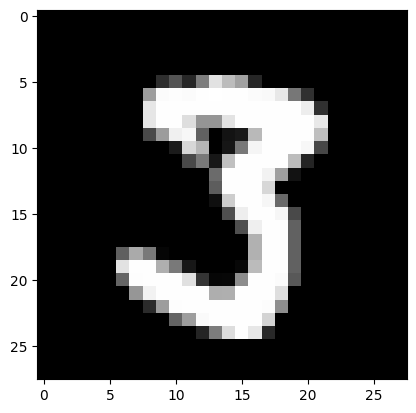

index: 50947
Lable: 9


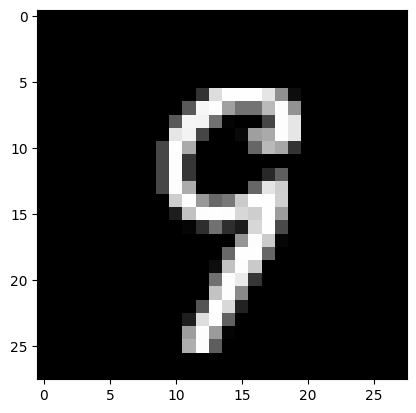

index: 54838
Lable: 2


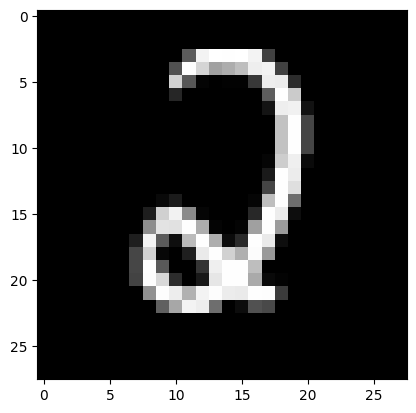

index: 4245
Lable: 0


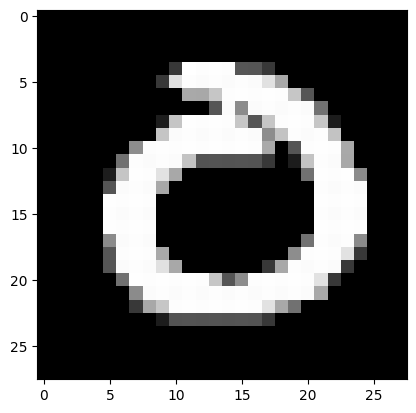

index: 58594
Lable: 0


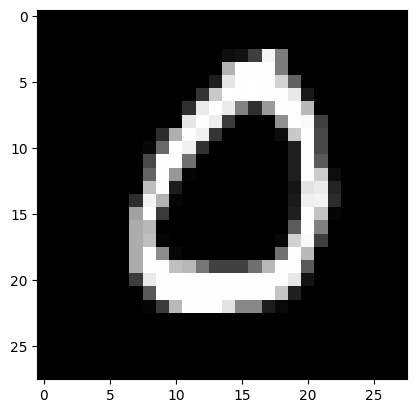

index: 26384
Lable: 6


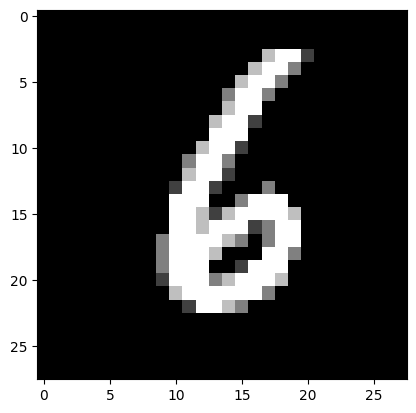

In [23]:
print("Randomly printing 10 images with labels from training dataset")
display_random_images_with_labels(dataset[0])

Randomly printing 10 images with labels from testing dataset
index: 43079
Lable: 2


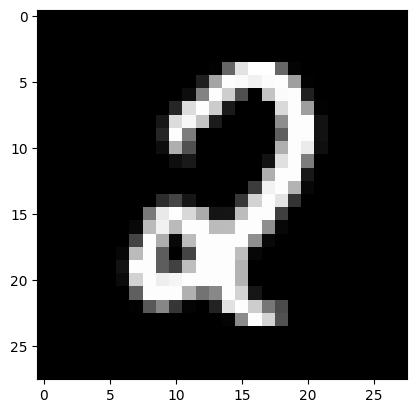

index: 53173
Lable: 0


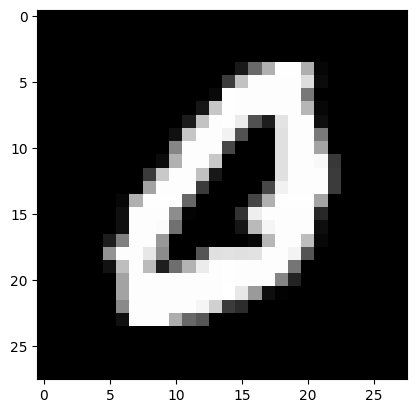

index: 34803
Lable: 0


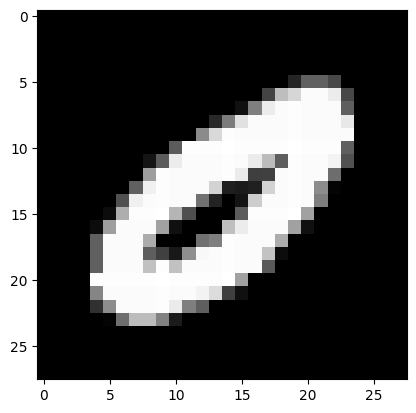

index: 25802
Lable: 3


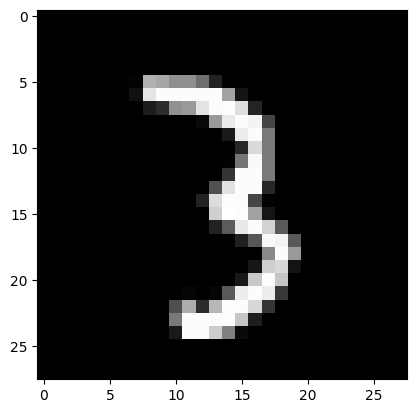

index: 1669
Lable: 6


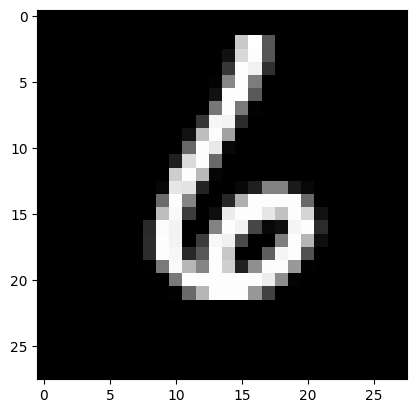

index: 41552
Lable: 3


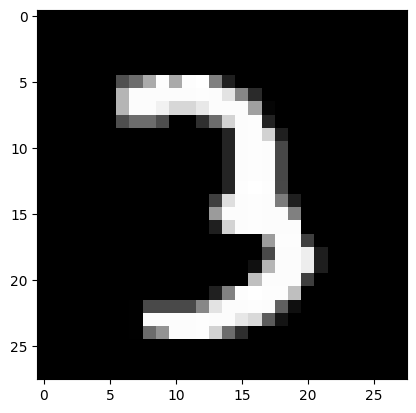

index: 38306
Lable: 6


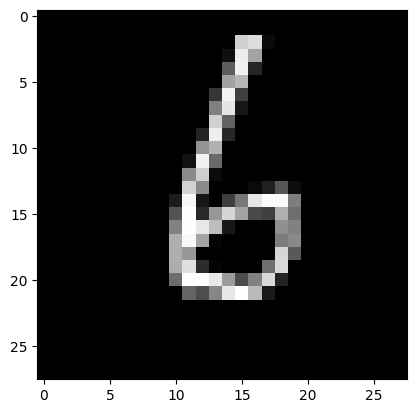

index: 19574
Lable: 7


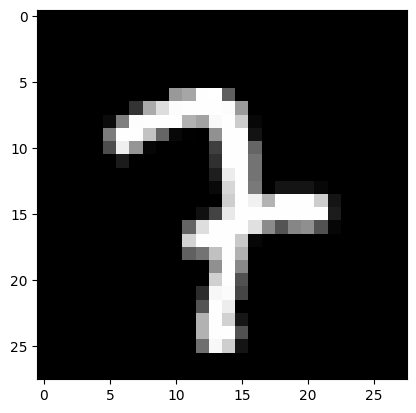

index: 20355
Lable: 3


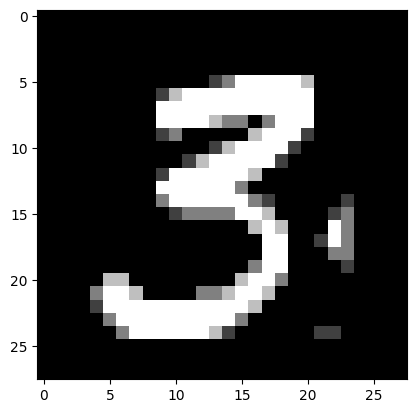

index: 26663
Lable: 9


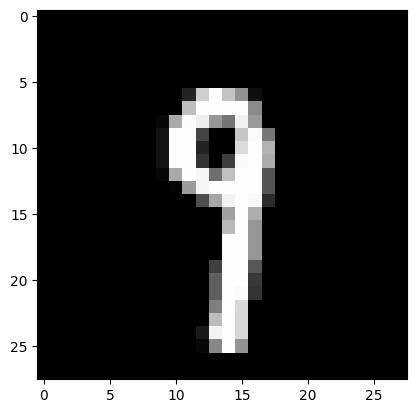

In [22]:
print("Randomly printing 10 images with labels from testing dataset")

display_random_images_with_labels(dataset[0])

In [25]:
print("There are",len(dataset[0][1]),"labels in training dataset for",len(dataset[0][0]),"images in training dataset")

There are 60000 labels in training dataset for 60000 images in training dataset


In [26]:
print("There are",len(dataset[1][1]),"labels in training dataset for",len(dataset[1][0]),"images in training dataset")

There are 10000 labels in training dataset for 10000 images in training dataset


In [27]:
print("There are", len(set(dataset[0][1])),"unique classes in training dataset")

There are 10 unique classes in training dataset


In [28]:
print("Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)")

Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)


In [29]:
display(collections.Counter(dataset[0][1]))

Counter({5: 5421,
         0: 5923,
         4: 5842,
         1: 6742,
         9: 5949,
         2: 5958,
         3: 6131,
         6: 5918,
         7: 6265,
         8: 5851})

In [53]:
training_count= 600
testing_count= 100

In [54]:
#creating a empty list for store new dataset
new_training_imgs= []

In [55]:
new_training_lbls= []

In [56]:
new_testing_imgs= []

In [57]:
new_testing_lbls= []

In [60]:
def reduce_instances_by_class(images, labels, instance_count):
  freq_dict = {i: 0 for i in range(10)}
  for lbl in labels:
    freq_dict[lbl] += 1
  selected_indices = []
  for i in range(10):
     index_list = np.where(np.array(labels) == i)[0]
     selected_indices_i = np.random.choice(index_list, instance_count, replace=False)
     selected_indices.extend(selected_indices_i)
  new_images = images[selected_indices]
  new_labels = labels[selected_indices]
  return new_images, new_labels

In [46]:
new_training_imgs, new_training_lbls = reduce_instances_by_class(dataset[0][0], dataset[0][1], training_count)

In [47]:
new_testing_imgs, new_testing_lbls = reduce_instances_by_class(dataset[1][0], dataset[1][1], testing_count)

In [48]:
new_dataset = (new_training_imgs, new_training_lbls), (new_testing_imgs, new_testing_lbls)

In [49]:
print("Reduced Training Dataset Size: ", len(new_dataset[0][1])) 

Reduced Training Dataset Size:  6000


In [50]:
print("Reduced Testing Dataset Size: ", len(new_dataset[1][1]))

Reduced Testing Dataset Size:  1000


In [51]:
print("Breakdown of each label in the new training dataset is below:")
display(collections.Counter(new_dataset[0][1]))

Breakdown of each label in the new training dataset is below:


Counter({0: 600,
         1: 600,
         2: 600,
         3: 600,
         4: 600,
         5: 600,
         6: 600,
         7: 600,
         8: 600,
         9: 600})

In [52]:
print("Breakdown of each label in the new testing dataset is below:")
display(collections.Counter(new_dataset[1][1]))

Breakdown of each label in the new testing dataset is below:


Counter({0: 100,
         1: 100,
         2: 100,
         3: 100,
         4: 100,
         5: 100,
         6: 100,
         7: 100,
         8: 100,
         9: 100})